# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


The objective of this experiment is to understand word2vec.

In this experiment we will use **Mahabharata** as our text corpus

#### Keywords

* Word2Vec
* Representation
* Train, Test split
* Visualization



The problem with count-based word representations is that they are costly in terms of memory to compute large co-occurrence matrices. Let us see another method to find representations of words without explicitly counting words.

Here, we aim to predict the next word given the context in which the word appears. (For example, given the last $n$ words, predict the next word). A very smart way to do this is by using a feature representation called "Word2Vec" with transforms each word into 300-dimensional vectors.

### Expected Time : 60mins

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W1_SUN_EXP1" #name of the notebook

def setup():
  ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/MB.txt")
  
  ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/MB2Vec.bin")
  
  ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/stopwords.txt")
 
  ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Saturday_Experiment/word2vec.png")
 
  ipython.magic("sx pip3 install gensim")
  print ("Setup completed successfully")
  return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print("Please enter valid Id")
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing the required packages

In [0]:
#vector space modeling and topic modeling toolkit
import gensim

# Operating System
import os

# Regular Expression
import re

# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PCA from scikit learn
from sklearn.decomposition import PCA

**Snowball** is a small string processing language designed for creating stemming algorithms for use in Information Retrieval. 

#### Creating a new instance of a language specific subclass.

In [0]:
stemmer = SnowballStemmer("english")

### Preprocessing

1. Cleaning dataset for text encoding issues :- Very useful when dealing with non-unicode characters
2. Creating a set of vocabulary excluding the stopwords
3. Stemming a word.
    
        Eg: print(stemmer.stem("running"))
    
        run

In [0]:
stopWords = pd.read_csv('stopwords.txt').values

class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words

Now, Let us read the data using an iterator in the class MySentences() which is a memory-friendly iterator. Load the pretrained vectors using gensim package.


In [0]:
sentences = MySentences(['MB.txt'])
model = gensim.models.Word2Vec(sentences, min_count=100)

Now Let us see what are the similar words related to certain characters names.

In [0]:
model.wv.most_similar('krishna')[:3]

[('kesava', 0.8501272201538086),
 ('vasudeva', 0.8088518381118774),
 ('govinda', 0.7834056615829468)]

In [0]:
model.wv.most_similar('arjuna')[:3]

[('partha', 0.901719331741333),
 ('dhananjaya', 0.8183932304382324),
 ('vibhatsu', 0.8090661764144897)]

In [0]:
model.wv.most_similar('virata')[:3]

[('drupada', 0.8655552864074707),
 ('chedi', 0.8367561101913452),
 ('kasi', 0.815403163433075)]

We will save the trained vectors

In [0]:
model.save("MB2Vec.bin")

In [0]:
model_load = gensim.models.Word2Vec.load('MB2Vec.bin')

Constructing the word and vector list by iterating through the vocabulary of the pretrained model.

In [0]:
words_list = np.array([])
vector_list = np.array([])
for i in model.wv.vocab:
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model[i])
    except :
        pass
vector_list = vector_list.reshape(len(model.wv.vocab), -1)

In [0]:
vector_list

array([[ 0.17481838, -0.76076287,  0.92169809, ..., -0.04633091,
         0.28000027, -0.68469989],
       [-0.35035965, -0.20378643,  0.20354865, ..., -0.04027359,
        -0.19748648,  0.06727996],
       [ 0.28138286, -0.99384868,  0.99243116, ..., -0.28317437,
         0.36343884, -0.46918666],
       ...,
       [ 0.53301901,  0.18211627,  0.13286102, ...,  0.20811543,
         0.23237224,  0.059117  ],
       [ 0.42057577, -0.19205321,  0.11136034, ...,  0.09947822,
         0.19869079,  0.34587729],
       [ 0.02716141,  0.24182972,  0.3415516 , ...,  0.15718558,
         0.40799826, -0.02458294]])

As vector_list dimenssion are huge in order to reduce the dimenssion of the vector_list we will use PCA on the vector_list to reduce it dimenssion to 2.

In [0]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

Now let us check the shape of the vector_list before reducing its dimenssions.

In [0]:
vector_list.shape

(1701, 100)

Let us check the shape the of  vector_list (compressed_list) after reducing its dimenssion using PCA.

In [0]:
compressed_list.shape

(1701, 2)

Now, let us find the location of some characters in word_list to get the locations.

In [0]:
characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1659, 1572, 1381, 1646, 1531, 1603]


To get more sense of what actually we did till now. let us visualize the data

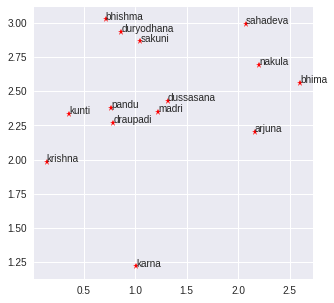

In [0]:
%matplotlib inline
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model[character]
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "r*")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec.png')

Now let us see the most similar characters related to characters list as show below

#### characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

In [0]:
for character in characters:
    near = model.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:vikarna:chitrasena:somadatta
sakuni	dussasana:duhsasana:vikarna:suvala:valhika
duryodhana	dussasana:suyodhana:sakuni:jayadratha:dhritarashtra
bhishma	salya:vaisampayana:sanjaya:savyasachin:kama
krishna	kesava:vasudeva:govinda:madhava:vibhatsu
madri	somadatta:prishata:subhadra:suvala:nakula
pandu	pritha:kunti:radha:suta:subhadra
kunti	pritha:radha:pandu:suta:subhadra
karna	duhsasana:yuyudhana:abhimanyu:vikarna:jayadratha
bhima	bhimasena:vrikodara:abhimanyu:satyaki:lakshmana
arjuna	partha:dhananjaya:vibhatsu:kama:bhima
nakula	sahadeva:vikarna:duhsasana:aswatthaman:satyaki
sahadeva	nakula:satyaki:vikarna:dhrishtadyumna:duhsasana
draupadi	drupada:madri:suvala:dussasana:uncl


### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful. Ref: 11
